# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


#### Merge data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)


#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [4]:
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

#### Make columns correct type

In [6]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype(float)

### Augment data with additional columns

#### Add month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')


#### Add city column

In [8]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(state):
    return state.split(",")[2].strip(" ").split(" ")[0]
    
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})" )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Make Datetimes

In [9]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


## Data Exploration!


#### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.groupby('Month')['Sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

<BarContainer object of 12 artists>

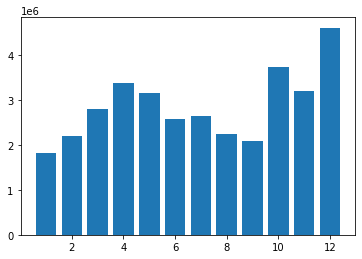

In [12]:
results = all_data.groupby('Month')['Sales'].sum()

months = range(1,13)
plt.bar(months,results)

December is the higest month for sales, this makes sense as many people are buying gifts for holiday seasons

#### Question 2: What city sold the most product?

<AxesSubplot:xlabel='City'>

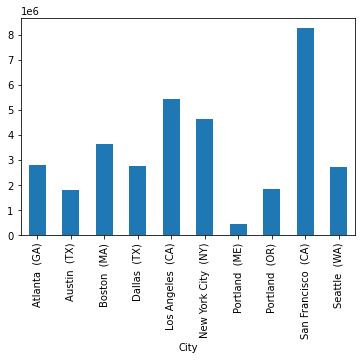

In [13]:
all_data.groupby('City')['Sales'].sum().plot(kind='bar')

San Francisco is the city that buys the most products. This makes sense as San Francisco is known as a Tech Hub

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

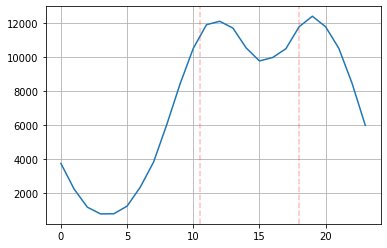

In [14]:
all_data['Count'] = 1
temp_df = all_data.drop_duplicates(subset=['Order ID'])


hours = [hour for hour, df in temp_df.groupby(['Hour'])]

plt.plot(hours, temp_df.groupby(['Hour']).count()['Count'])
plt.grid()
plt.axvline(x=18,linestyle="--",color='red',alpha=0.25)
plt.axvline(x=10.5,linestyle="--",color='red',alpha=0.25)



From from this plot the best times to push advetisements would be roughly 10:30am or 6pm.

#### Question 4: What products are most often sold together?

In [15]:
all_data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [16]:
temp_df = all_data[['Order ID','Grouped']]
temp_df = temp_df.drop_duplicates()
temp_df['Grouped'].value_counts().sort_values()

Google Phone,USB-C Charging Cable,USB-C Charging Cable        1
LG Dryer,27in 4K Gaming Monitor                               1
iPhone,Google Phone                                           1
LG Dryer,AAA Batteries (4-pack)                               1
Flatscreen TV,20in Monitor                                    1
                                                          ...  
Wired Headphones                                          17208
USB-C Charging Cable                                      19792
AA Batteries (4-pack)                                     19809
AAA Batteries (4-pack)                                    19826
Lightning Charging Cable                                  19831
Name: Grouped, Length: 385, dtype: int64

In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in temp_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


The combinations of a Phone and a Charging Cable is the most common followed by a Phone and Headphones.}

#### Question 5:What product sold the most? Why do you think it sold the most?

In [18]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

Batteries are the most bought items. This makes sense as they are small purchaces that will eventually die out and need replacing.